**Hierarchical Clustering**

* **Description**: Builds a hierarchy of clusters either in an agglomerative (bottom-up) or divisive (top-down) manner.

* **Algorithm:**


1.   **Agglomerative:**



*   Start with each data point as a single cluster.

* Merge the closest pair of clusters.
* Repeat until all points are in a single cluster.


2.   **Divisive:**

* Start with all data points in one cluster.
* Recursively split the clusters until each point is in its own cluster.





In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load the dataset
data = load_wine()
X = data.data

# Convert to DataFrame
wine_df = pd.DataFrame(X, columns=data.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# **MinMaxScaler**

In [3]:
X= MinMaxScaler().fit_transform(wine_df)
X[:5]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ,
        0.98965517, 0.66455696, 0.20754717, 0.55835962, 0.55631399,
        0.30894309, 0.7985348 , 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.53608247, 0.52173913,
        0.62758621, 0.49578059, 0.49056604, 0.44479495, 0.25938567,
        0.45528455, 0.60805861, 0.32596291]])

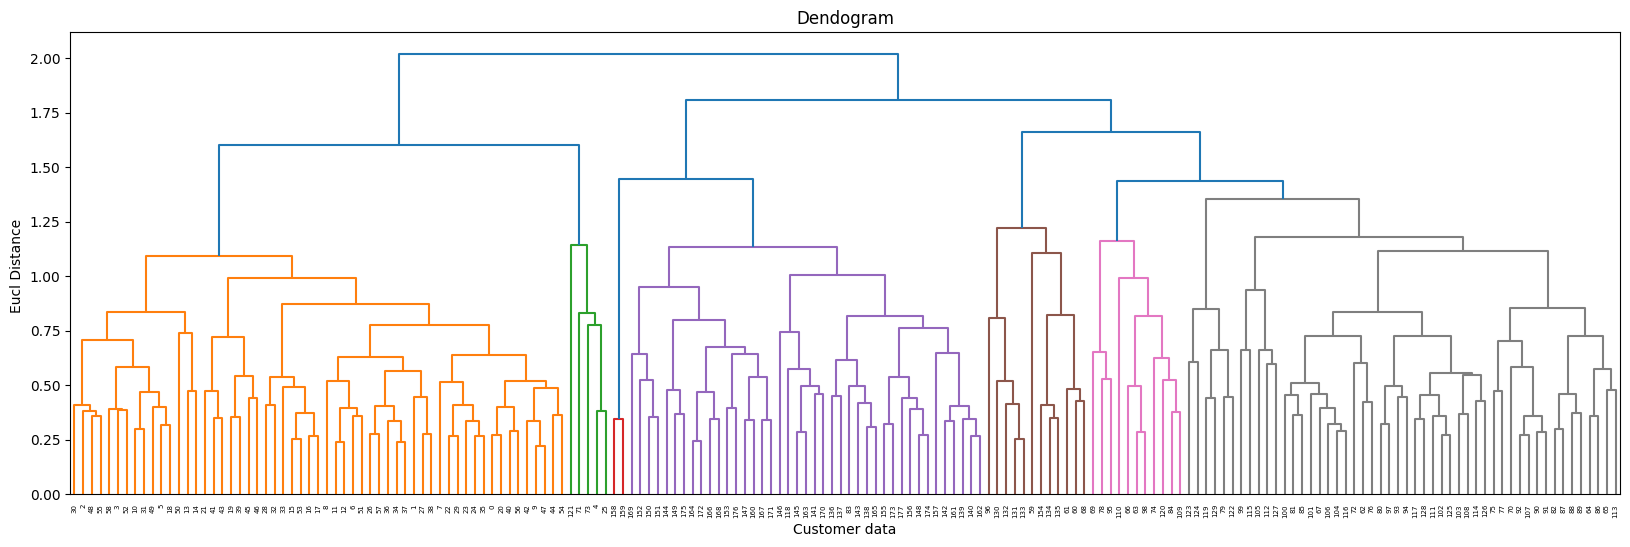

In [4]:
plt.figure(figsize=(20,6))
dendo = dendrogram(linkage(X,method='complete'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance ')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
group = AgglomerativeClustering(n_clusters=3)
cluster = group.fit_predict(X)
print (cluster)

[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
# Model evaluation tool
from sklearn.metrics import silhouette_score

# Check how well your model is making clusters
silhouette_score(wine_df,cluster)

0.19146576071284255

In [9]:
## Save data according to the cluster for further analysis/process.
q_1 = wine_df[cluster==0]
q_2 = wine_df[cluster==1]
q_3 = wine_df[cluster==2]

In [10]:
q_2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
83,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.8,0.84,2.01,515.0
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.4,0.70,2.12,372.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.1,0.76,1.29,630.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.4,0.74,1.42,530.0
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.7,0.66,1.36,560.0
